In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
%cd drive/MyDrive/resnet_miniproject/

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader

import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch.utils.data as data

from model_dropout import ResidualBlock, ResNet
from train_eval_util import train, evaluate, calculate_accuracy, epoch_time, total_params, total_layers, get_predictions, plot_confusion_matrix
from dataset import train_data, valid_data, test_data

import time
import numpy as np 
import matplotlib.pyplot as plt

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [3]:
if torch.cuda.is_available():
    device = torch.device('cuda')
elif torch.backends.mps.is_available():
    device = torch.device('mps')  
else:
    device = torch.device('cpu')

print(f"Selected device: {device}")

Selected device: mps


In [4]:
BATCH_SIZE = 32

train_iterator = DataLoader(train_data, batch_size= BATCH_SIZE, shuffle=True)
valid_iterator =  DataLoader(valid_data, batch_size=BATCH_SIZE, shuffle=False)
test_iterator =  DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=True)

In [5]:
model = torch.load('model_dropout.pt').to(device)
criterion = nn.CrossEntropyLoss().to(device)

test_loss, test_accurcy = evaluate(model, test_iterator, criterion, device)
print(f'test loss: {test_loss:.3f}, validation: {test_accurcy*100:.3f}')


test loss: 0.256, validation: 92.752


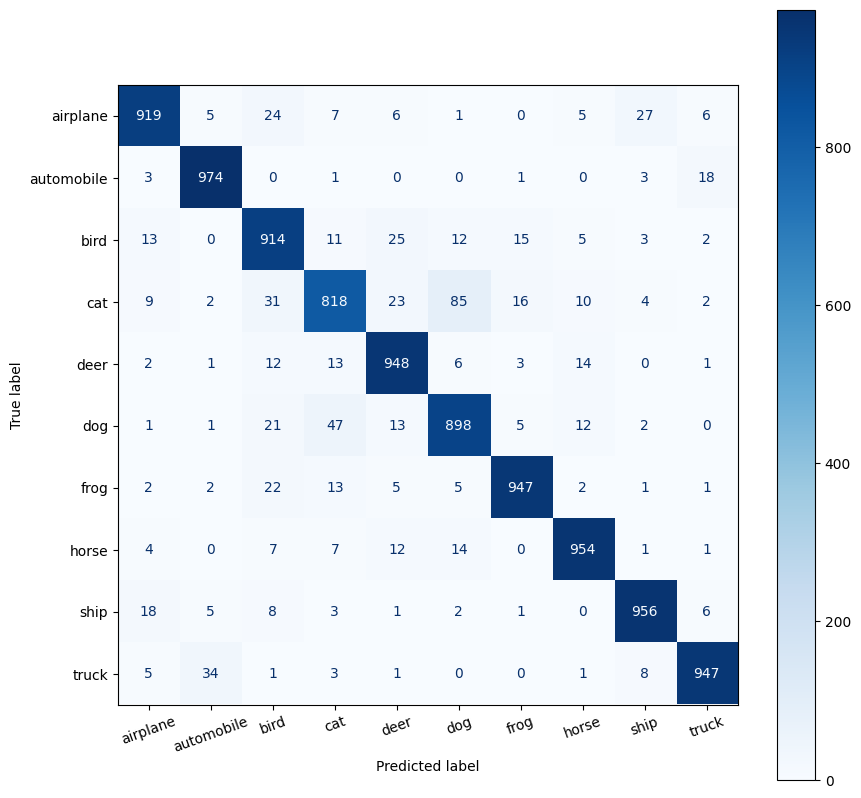

In [6]:
classes = test_data.classes
labels, probs = get_predictions(model.cpu(), test_iterator, torch.device('cpu'))
pred_labels = torch.argmax(probs, 1)
# pred_labels.cpu()
plot_confusion_matrix(labels, pred_labels, classes) 